## Here the 'Sale Price' is our Target variable & house characteristics are independent variables on which the Sale Price of house may depend.

In [224]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action = 'ignore')

In [225]:
data = pd.read_csv(r"D:\House Price Prediction\Raw_Housing_Prices.csv")

## Since we have target variable for this model, this is an example of supervised learning. And since our target variable is a numeric continuous variable, we will build 'linear regression' model to predict the Sale Price of house.

# 1: Data exploration of Target variable

## 1.1. Distribution of Data

In [226]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [227]:
len(data['Sale Price'])

21613

In [228]:
data['Sale Price'].describe().round()

count      21609.0
mean      540198.0
std       367389.0
min        75000.0
25%       321950.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: Sale Price, dtype: float64

### By observing this we found,
#### 1. 21613-21609 = 4 missing values
#### 2. Mean is higher than median. It means the data may have contain few outliers of high values.
#### 3. Data is left skewed because mean is higher than 50%(median).
#### 4. Data is not normally distributed

## 1.2. Treating Outliers of Target variable


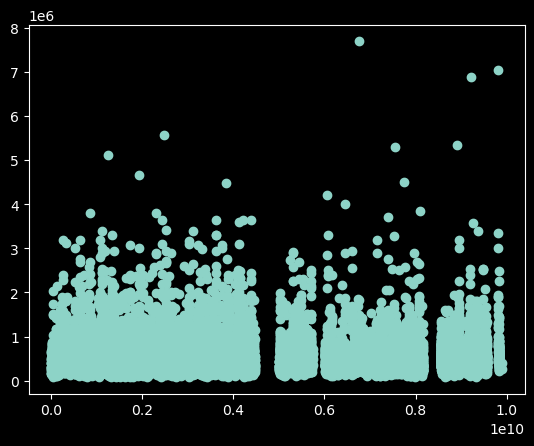

In [229]:
plt.style.use('default')
plt.style.use('dark_background')
plt.scatter(x=data['ID'],y=data['Sale Price'])

In [230]:
Q1 = data['Sale Price'].quantile(0.25) # 1st quantile
Q3 = data['Sale Price'].quantile(0.75) # 3rd quantile

iqr = Q3 - Q1
iqr

323050.0

In [231]:
lower_limit = Q1 - 1.5 * iqr
upper_limit = Q3 + 1.5 * iqr

lower_limit, upper_limit

(-162625.0, 1129575.0)

In [232]:
minimum_value = min(data['Sale Price'])
maximum_value = max(data['Sale Price'])


print(lower_limit,"  ",upper_limit)
print(minimum_value,"  ",maximum_value)

-162625.0    1129575.0
75000.0    7700000.0


### our lower limit is lower than minimum value thats why redefining lower limit with minimum value

In [233]:
lower_limit = minimum_value
lower_limit

75000.0

In [234]:
import seaborn as sns

<AxesSubplot:xlabel='Sale Price'>

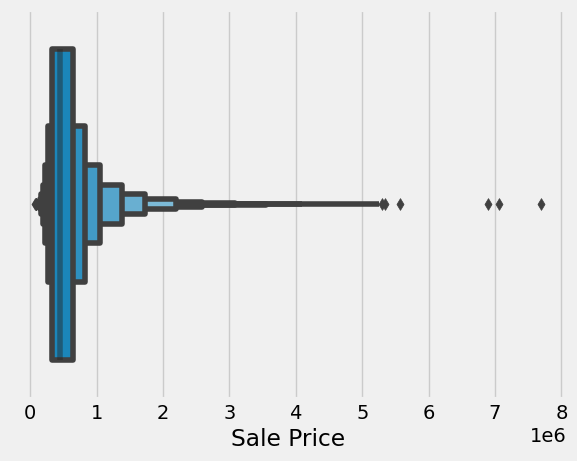

In [235]:
plt.style.use('default')
plt.style.use('fivethirtyeight')
sns.boxenplot(x=data['Sale Price'])

#### Capping Outliers

In [236]:
def limit_imputer(value):
    if value > upper_limit:
        return upper_limit
    if value < lower_limit:
        return lower_limit
    else:
        return value

In [237]:
data['Sale Price'] = data['Sale Price'].apply(limit_imputer)

In [238]:
data['Sale Price'].describe().round()

count      21609.0
mean      511619.0
std       250062.0
min        75000.0
25%       321950.0
50%       450000.0
75%       645000.0
max      1129575.0
Name: Sale Price, dtype: float64

<AxesSubplot:xlabel='Sale Price'>

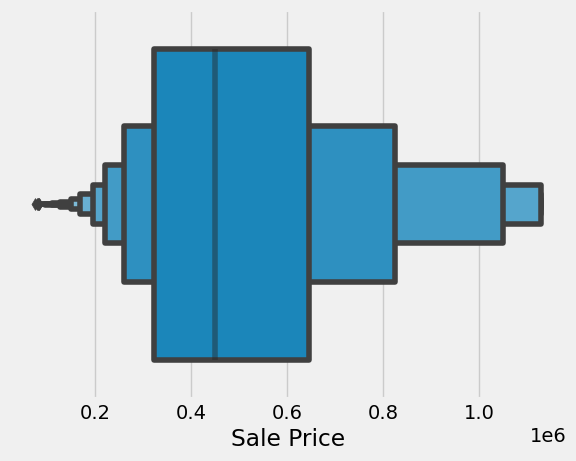

In [239]:
plt.style.use('default')
plt.style.use('fivethirtyeight')
sns.boxenplot(x=data['Sale Price'])

#### Mean > Median
#### data is not normally distributed and is bit skewed towards lower valuess.

## 1.3. Missing values in Target Variable

In [240]:
data['Sale Price'].isnull().sum()

4

#### For target variable, deletation of missing values is prefered, because ML model learns from target variables and imputing the target variable cause model to learn from our derived data and not the actual true data. 

In [241]:
data.dropna(inplace = True, axis=0, subset = ['Sale Price'])

In [242]:
data['Sale Price'].isnull().sum()

0

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

## 1.4. Histogram of Selling Price

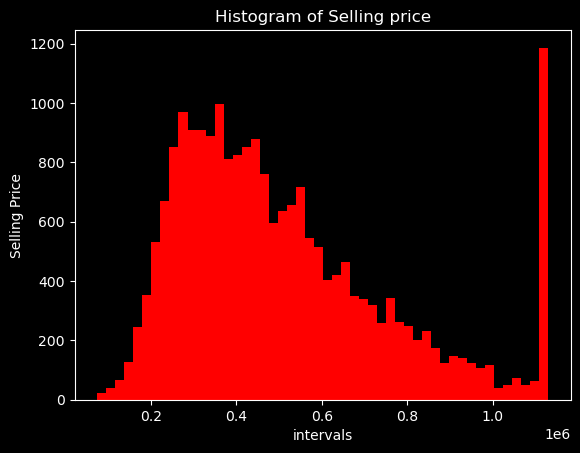

In [244]:
plt.style.use('default')
plt.style.use('dark_background')
plt.hist(data['Sale Price'], bins=50, color='red')
plt.xlabel('intervals')
plt.ylabel('Selling Price')
plt.title('Histogram of Selling price')
plt.show()

# 2. Data exploration of Independent Variables

## 2.1. Missing values in Independent Numerical Variables

In [245]:
# show null values in numerical column
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_data = data.select_dtypes(include=numerics)

numerical_data.isnull().sum()

ID                                           0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

#### We cannot consider zipcode as numerical variable. it is categorical.

In [246]:
numerical_columns = [
    'No of Bathrooms',
    'Flat Area (in Sqft)',
    'Lot Area (in Sqft)',
    'Area of the House from Basement (in Sqft)',
    'Latitude',
    'Longitude',
    'Living Area after Renovation (in Sqft)'
]

In [247]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan , strategy='median')

data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [248]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

## 2.2. Missing values in Independent Categorical Variables

In [249]:
# show null values in categorical column
categoricals = ['object']
categorical_data = data.select_dtypes(include=categoricals)

categorical_data.isnull().sum()

Date House was Sold       0
Waterfront View           0
No of Times Visited       0
Condition of the House    0
dtype: int64

In [250]:
data['Zipcode'].isnull().sum()

1

In [251]:
# we are treating zip code as categorical variable thats why,

data['Zipcode'].shape

(21609,)

In [252]:
# we will reshape this column

column = data['Zipcode'].values.reshape(-1,1)
column.shape

(21609, 1)

In [253]:
imputer =  SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['Zipcode'] = imputer.fit_transform(column)

In [254]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [255]:
data.to_csv(r"D:\House Price Prediction\Raw_Housing_Prices_1.csv" , index = False)

# 3: Feature Transformation of numerical variables

In [256]:
data = pd.read_csv(r"D:\House Price Prediction\Raw_Housing_Prices_1.csv")
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


## Distribution of the "Flat Area" is right skewed

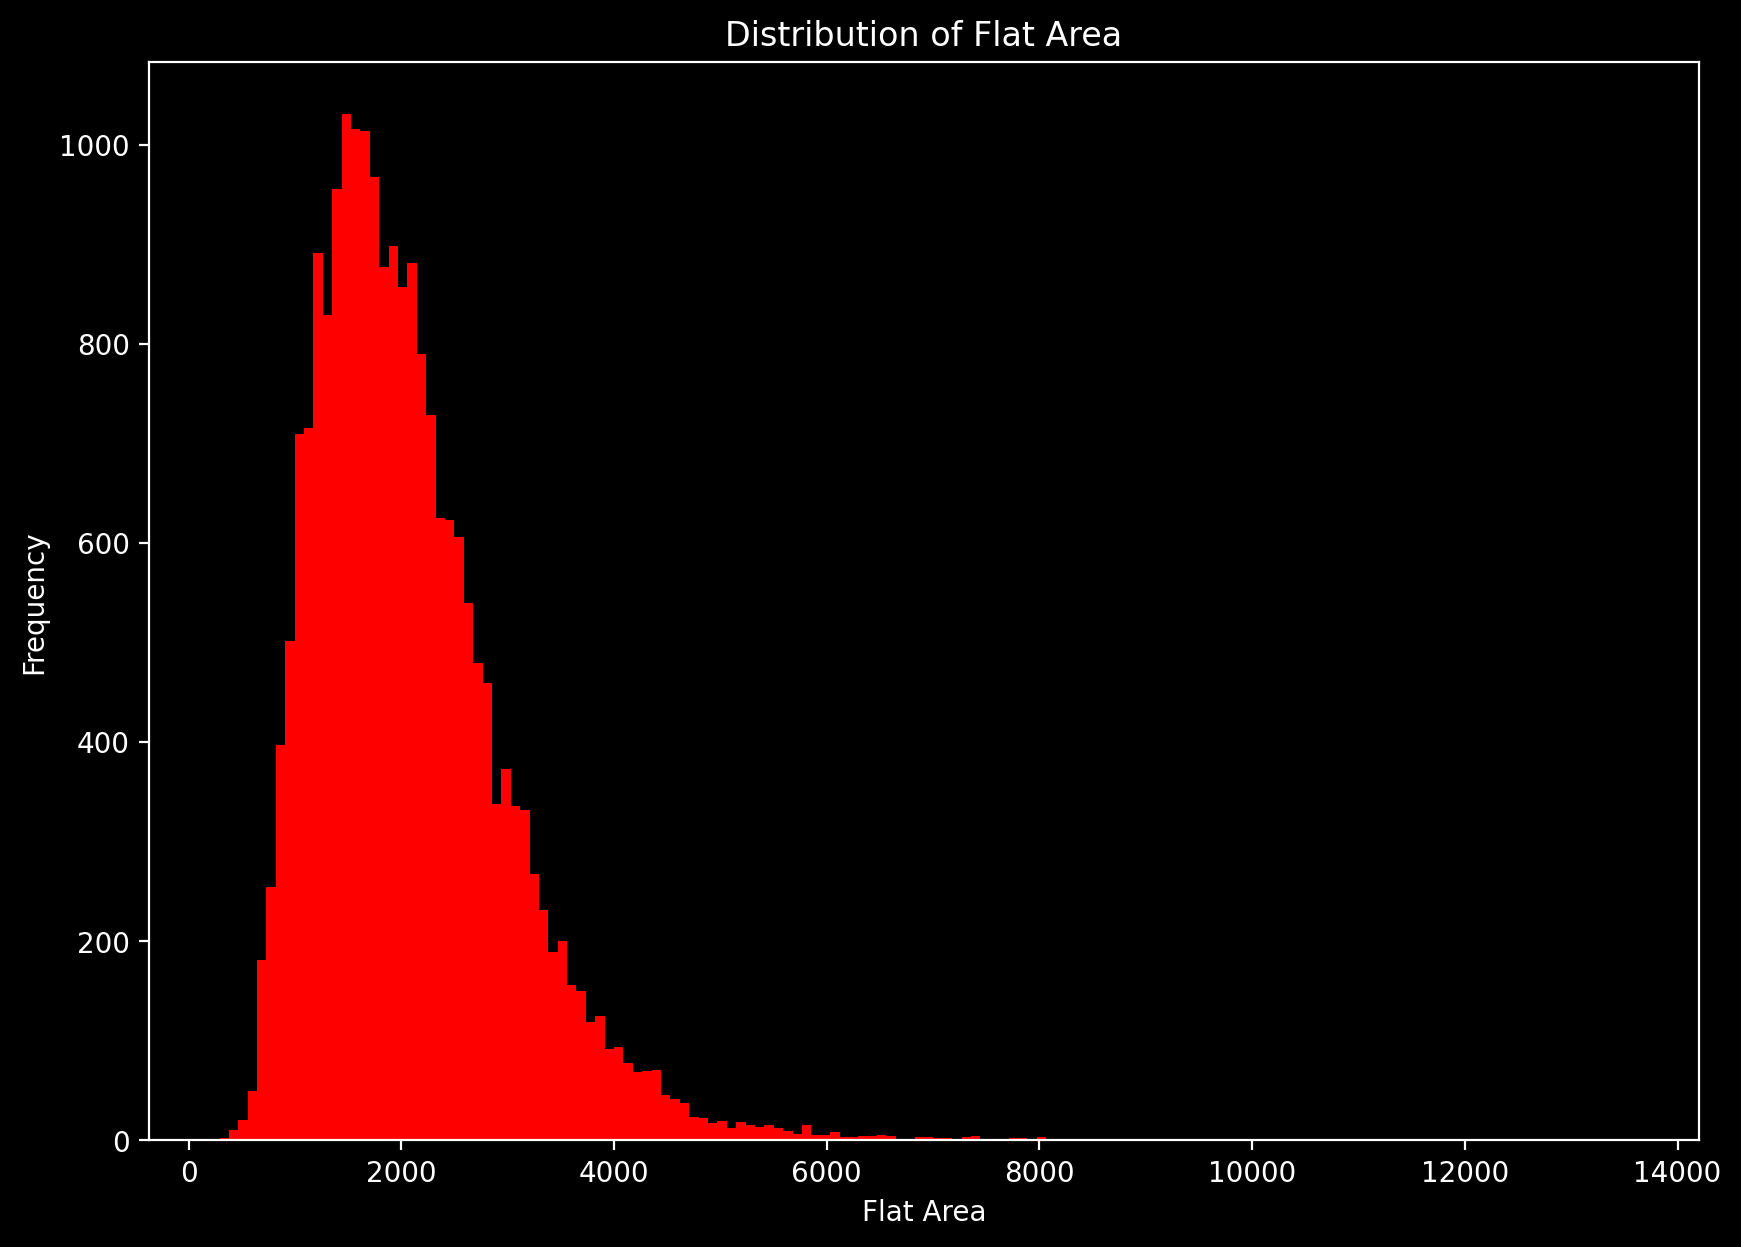

In [257]:
plt.figure(figsize=(10,7),dpi=200)
plt.hist(data['Flat Area (in Sqft)'], bins=150, color='red')
plt.xlabel('Flat Area')
plt.ylabel('Frequency')
plt.title('Distribution of Flat Area')
plt.show()

In [258]:
# This function takes sample data as parameter and returns log of it
def log_transform(sample_data):
    return np.log(sample_data)

In [259]:
data['Flat Area (in Sqft)'] = data['Flat Area (in Sqft)'].map(log_transform)

## Distribution of the "Flat Area" is now normally distributed

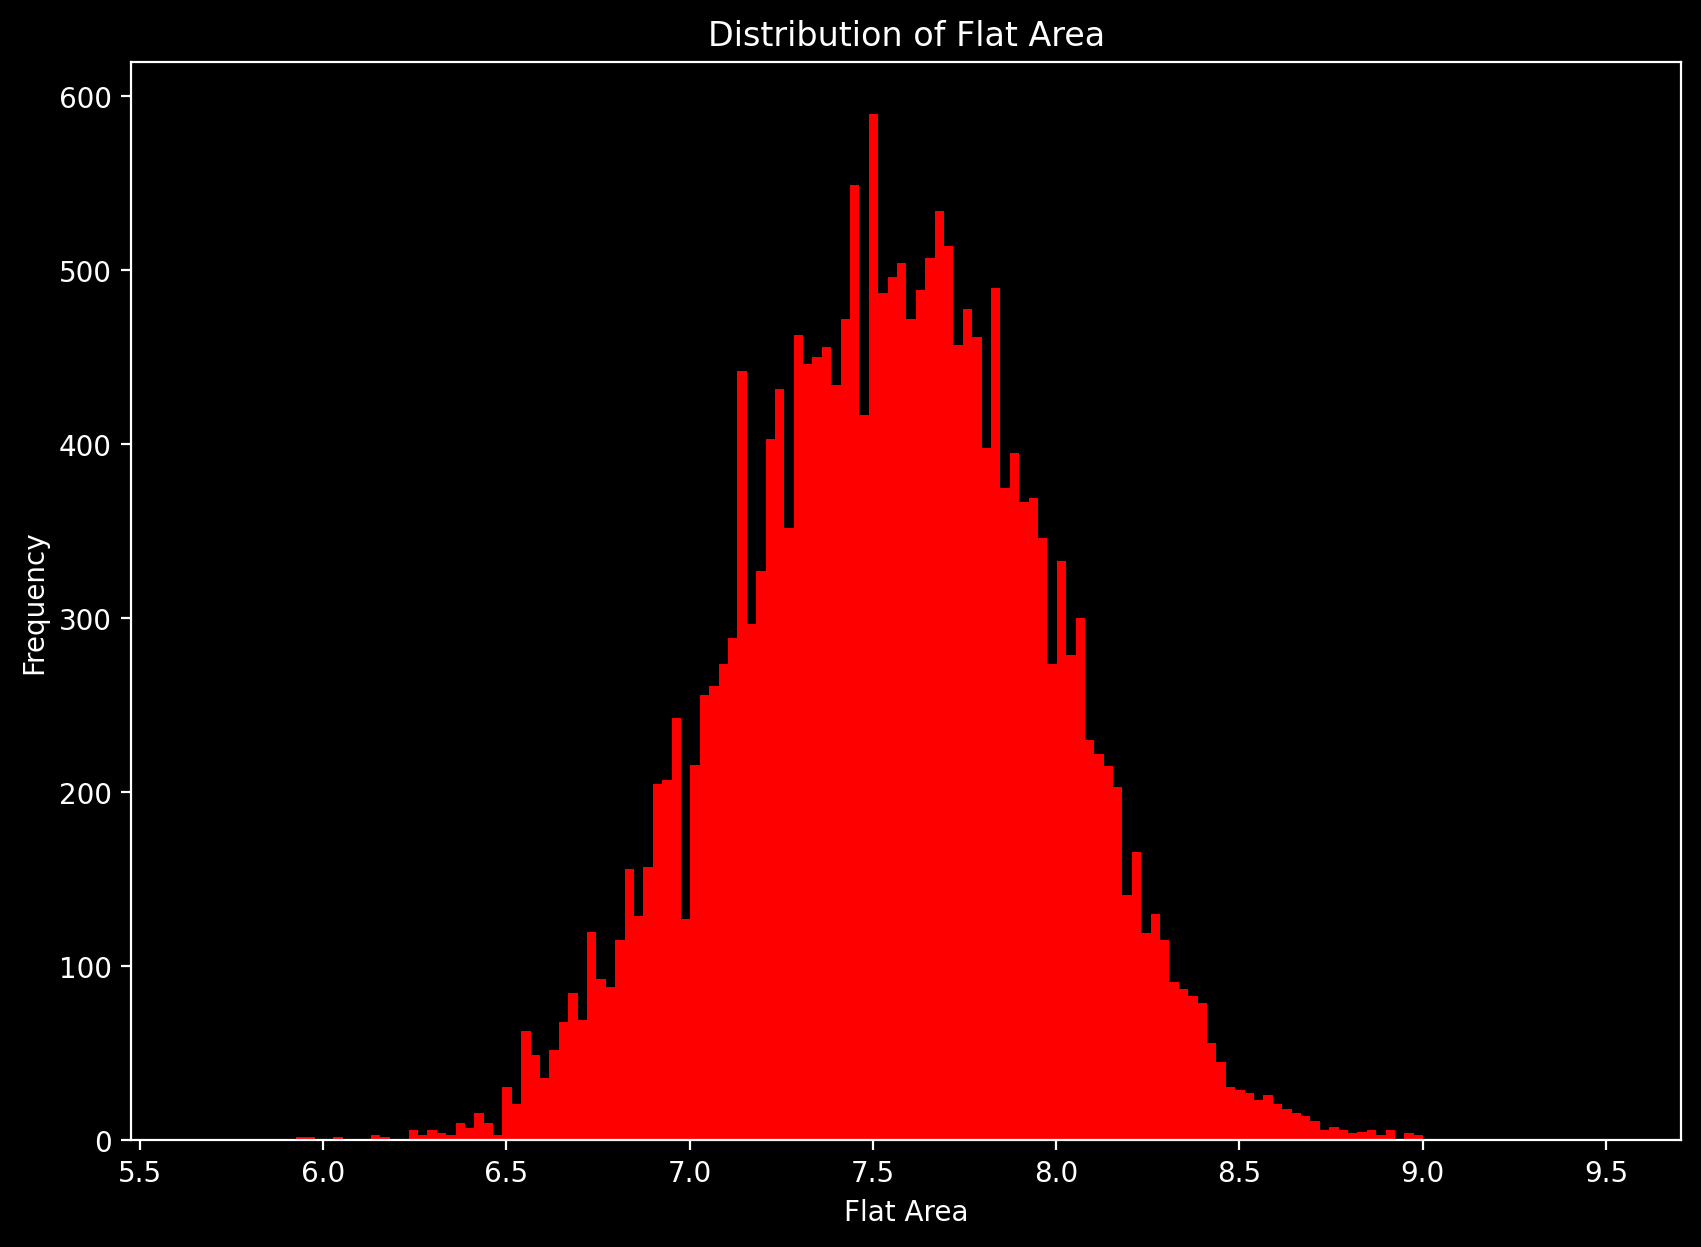

In [260]:
plt.figure(figsize=(10,7),dpi=200)
plt.hist(data['Flat Area (in Sqft)'], bins=150, color='red')
plt.xlabel('Flat Area')
plt.ylabel('Frequency')
plt.title('Distribution of Flat Area')
plt.show()

## Distribution of the "Area of the House from Basement" is right skewed

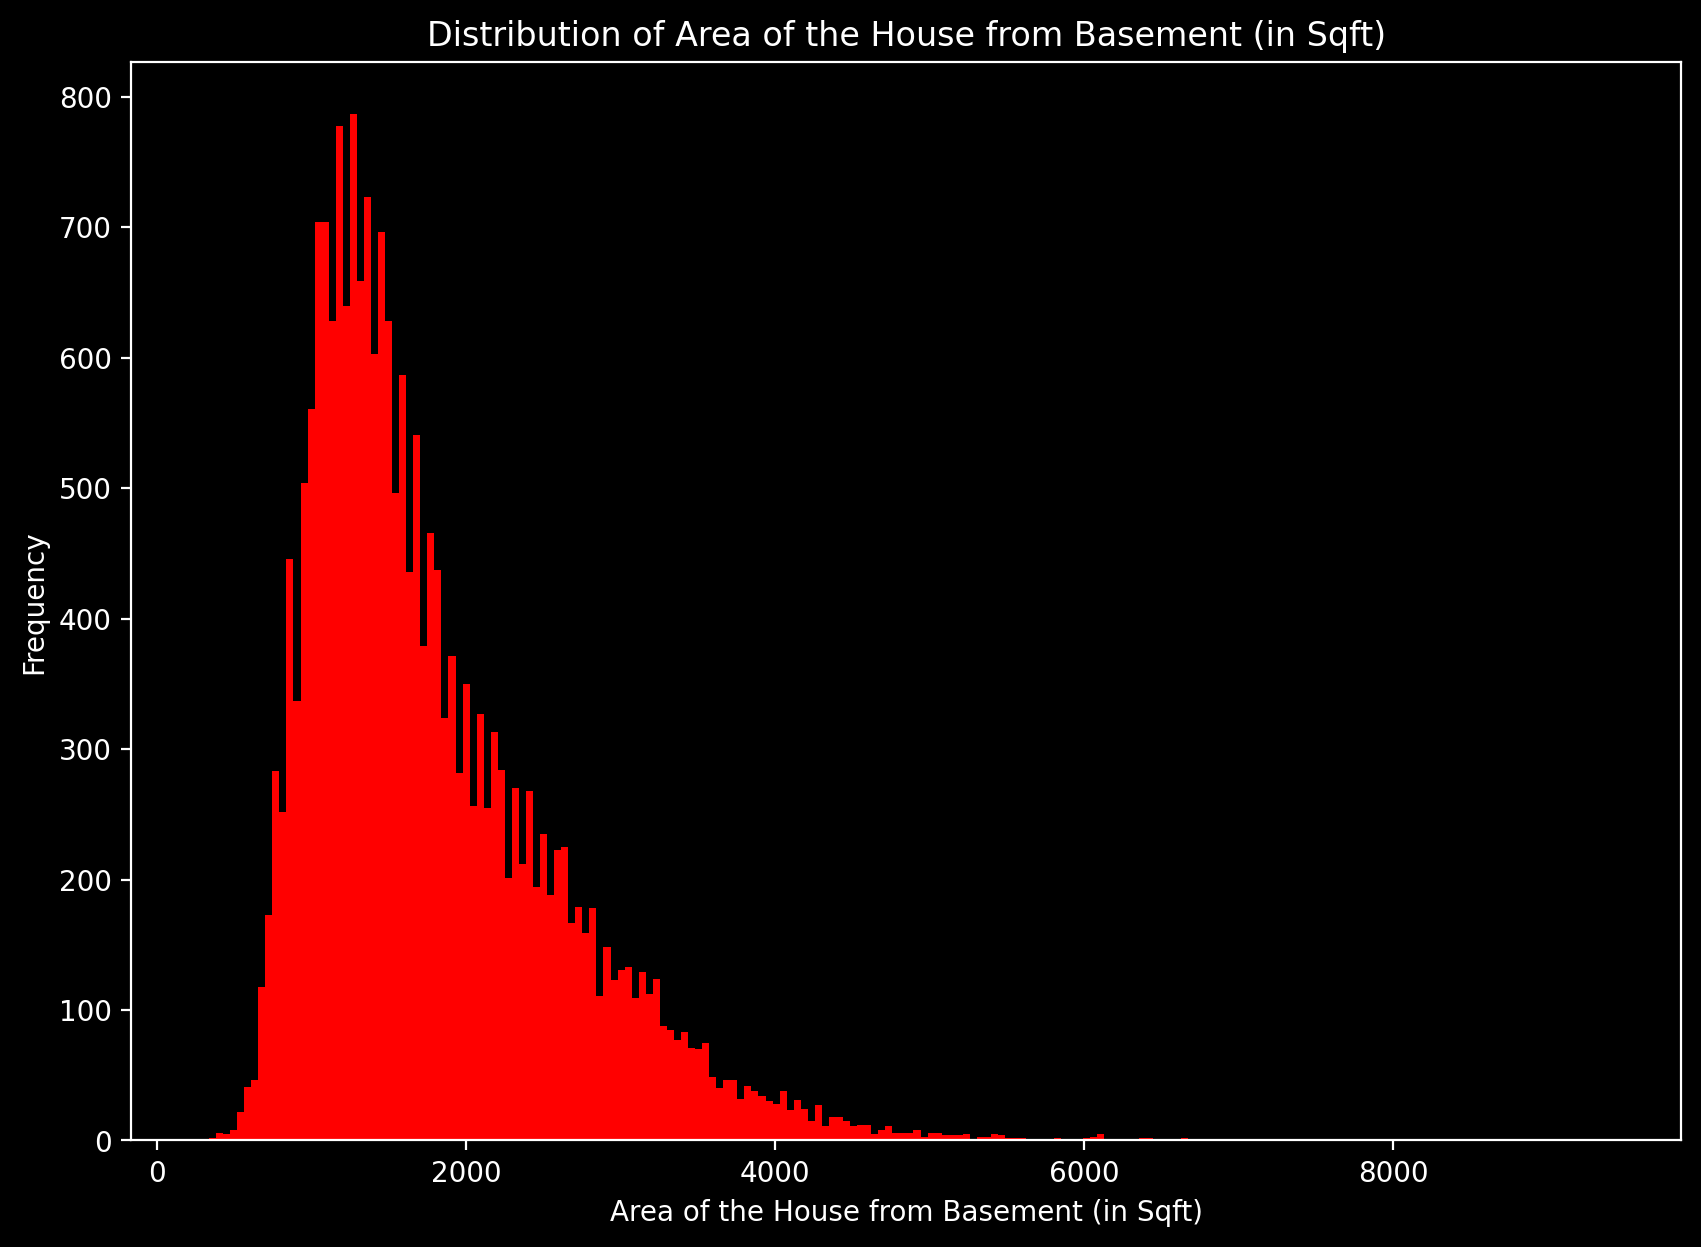

In [261]:
plt.figure(figsize=(10,7),dpi=200)
plt.hist(data['Area of the House from Basement (in Sqft)'], bins=200, color='red')
plt.xlabel('Area of the House from Basement (in Sqft)')
plt.ylabel('Frequency')
plt.title('Distribution of Area of the House from Basement (in Sqft)')
plt.show()

In [262]:
data['Area of the House from Basement (in Sqft)'] = data['Area of the House from Basement (in Sqft)'].map(log_transform)

## Distribution of the "Area of the House from Basement" is now normally distributed

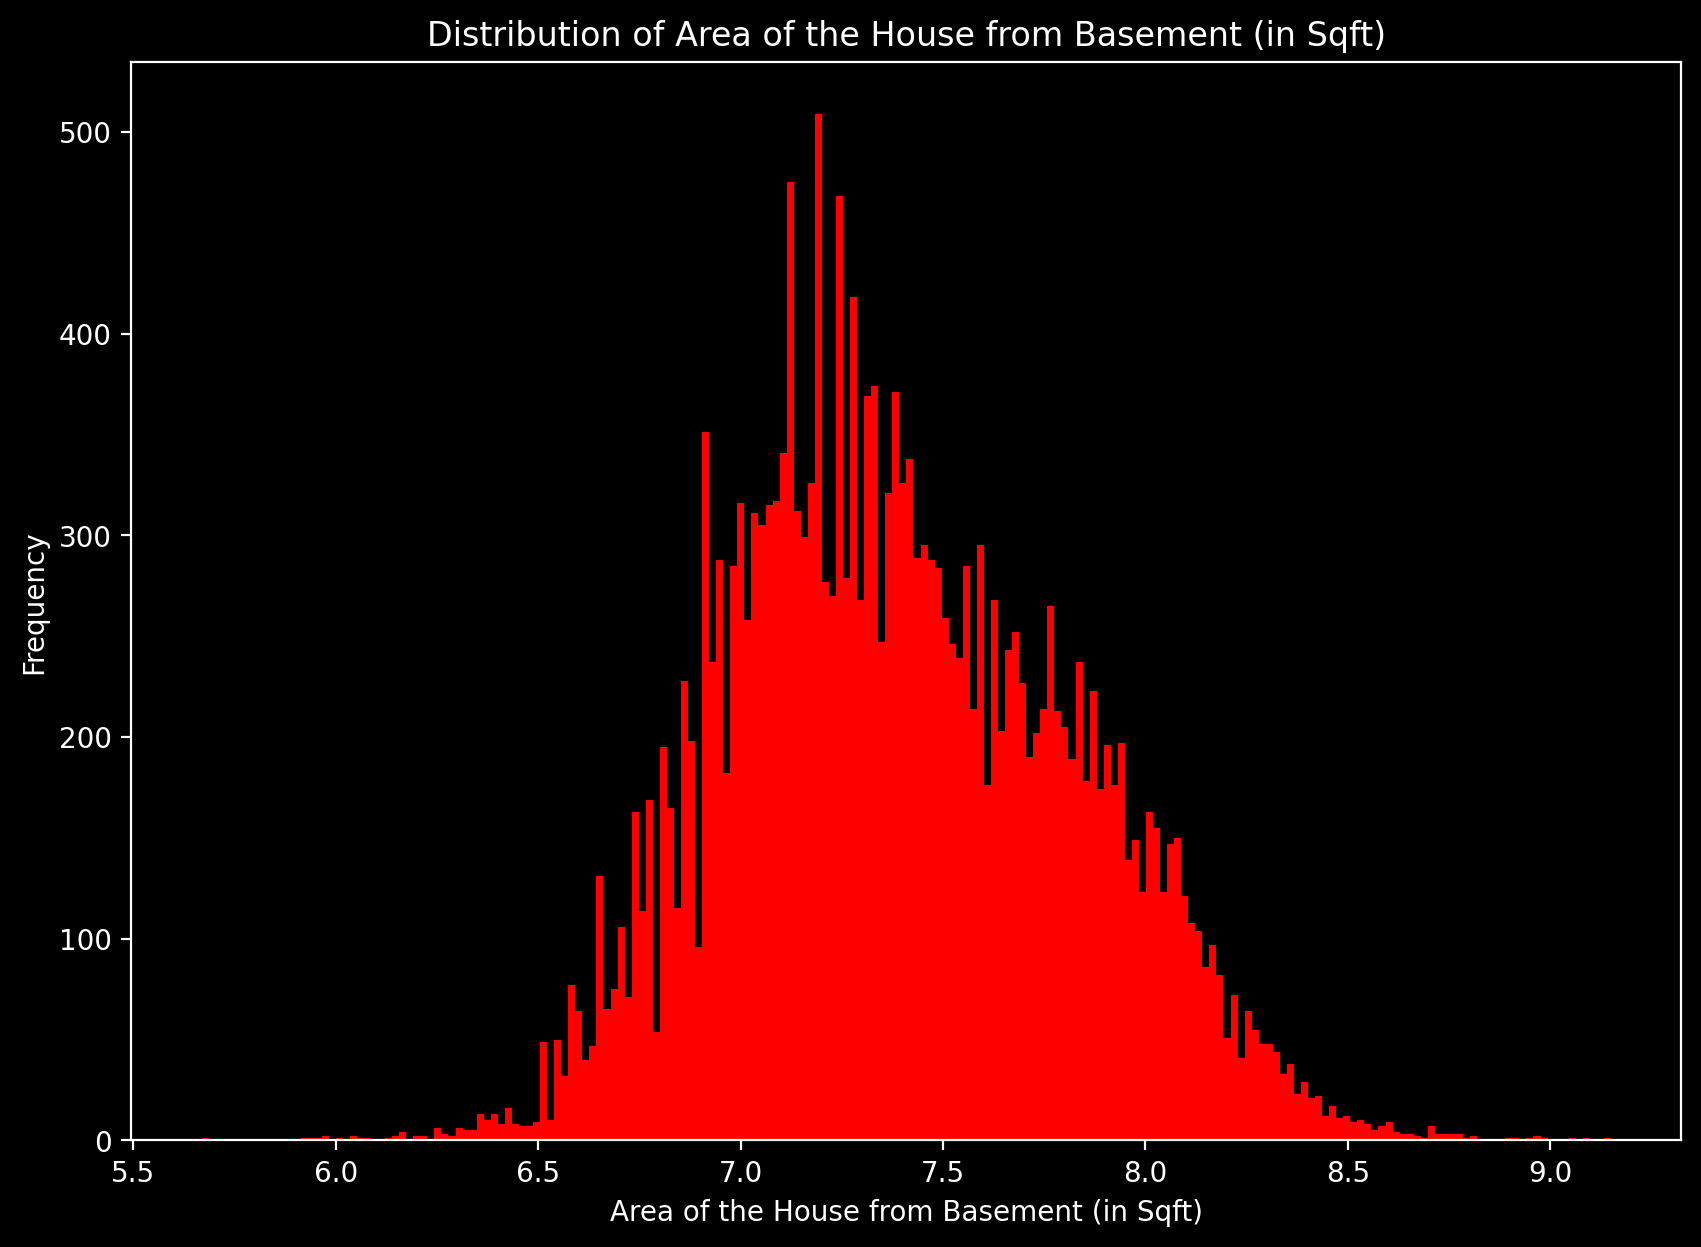

In [263]:
plt.figure(figsize=(10,7),dpi=200)
plt.hist(data['Area of the House from Basement (in Sqft)'], bins=200, color='red')
plt.xlabel('Area of the House from Basement (in Sqft)')
plt.ylabel('Frequency')
plt.title('Distribution of Area of the House from Basement (in Sqft)')
plt.show()

## Distribution of the "Living Area after Renovation" is right skewed

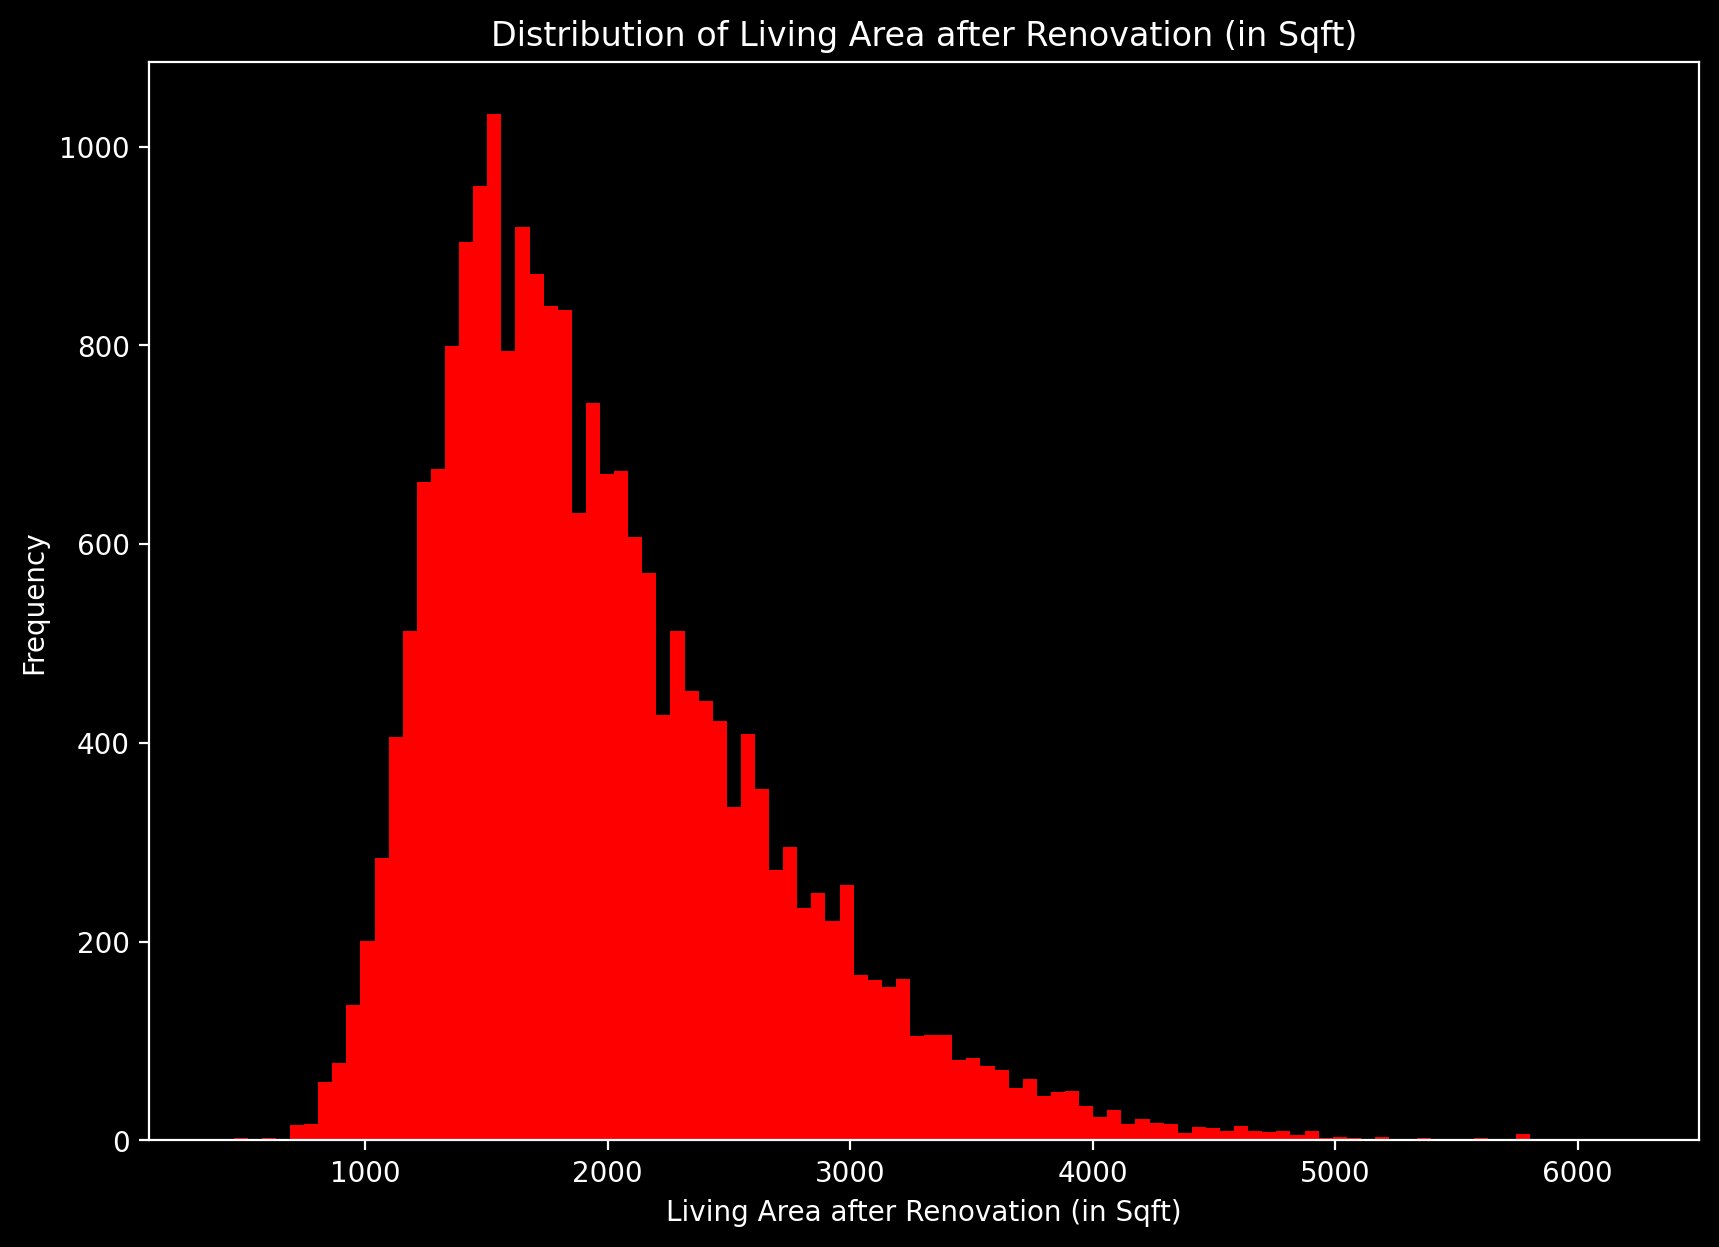

In [264]:
plt.figure(figsize=(10,7),dpi=200)
plt.hist(data['Living Area after Renovation (in Sqft)'], bins=100, color='red')
plt.xlabel('Living Area after Renovation (in Sqft)')
plt.ylabel('Frequency')
plt.title('Distribution of Living Area after Renovation (in Sqft)')
plt.show()

In [265]:
data['Living Area after Renovation (in Sqft)'] = data['Living Area after Renovation (in Sqft)'].map(log_transform)

## Distribution of the "Living Area after Renovation" is now normally distributed

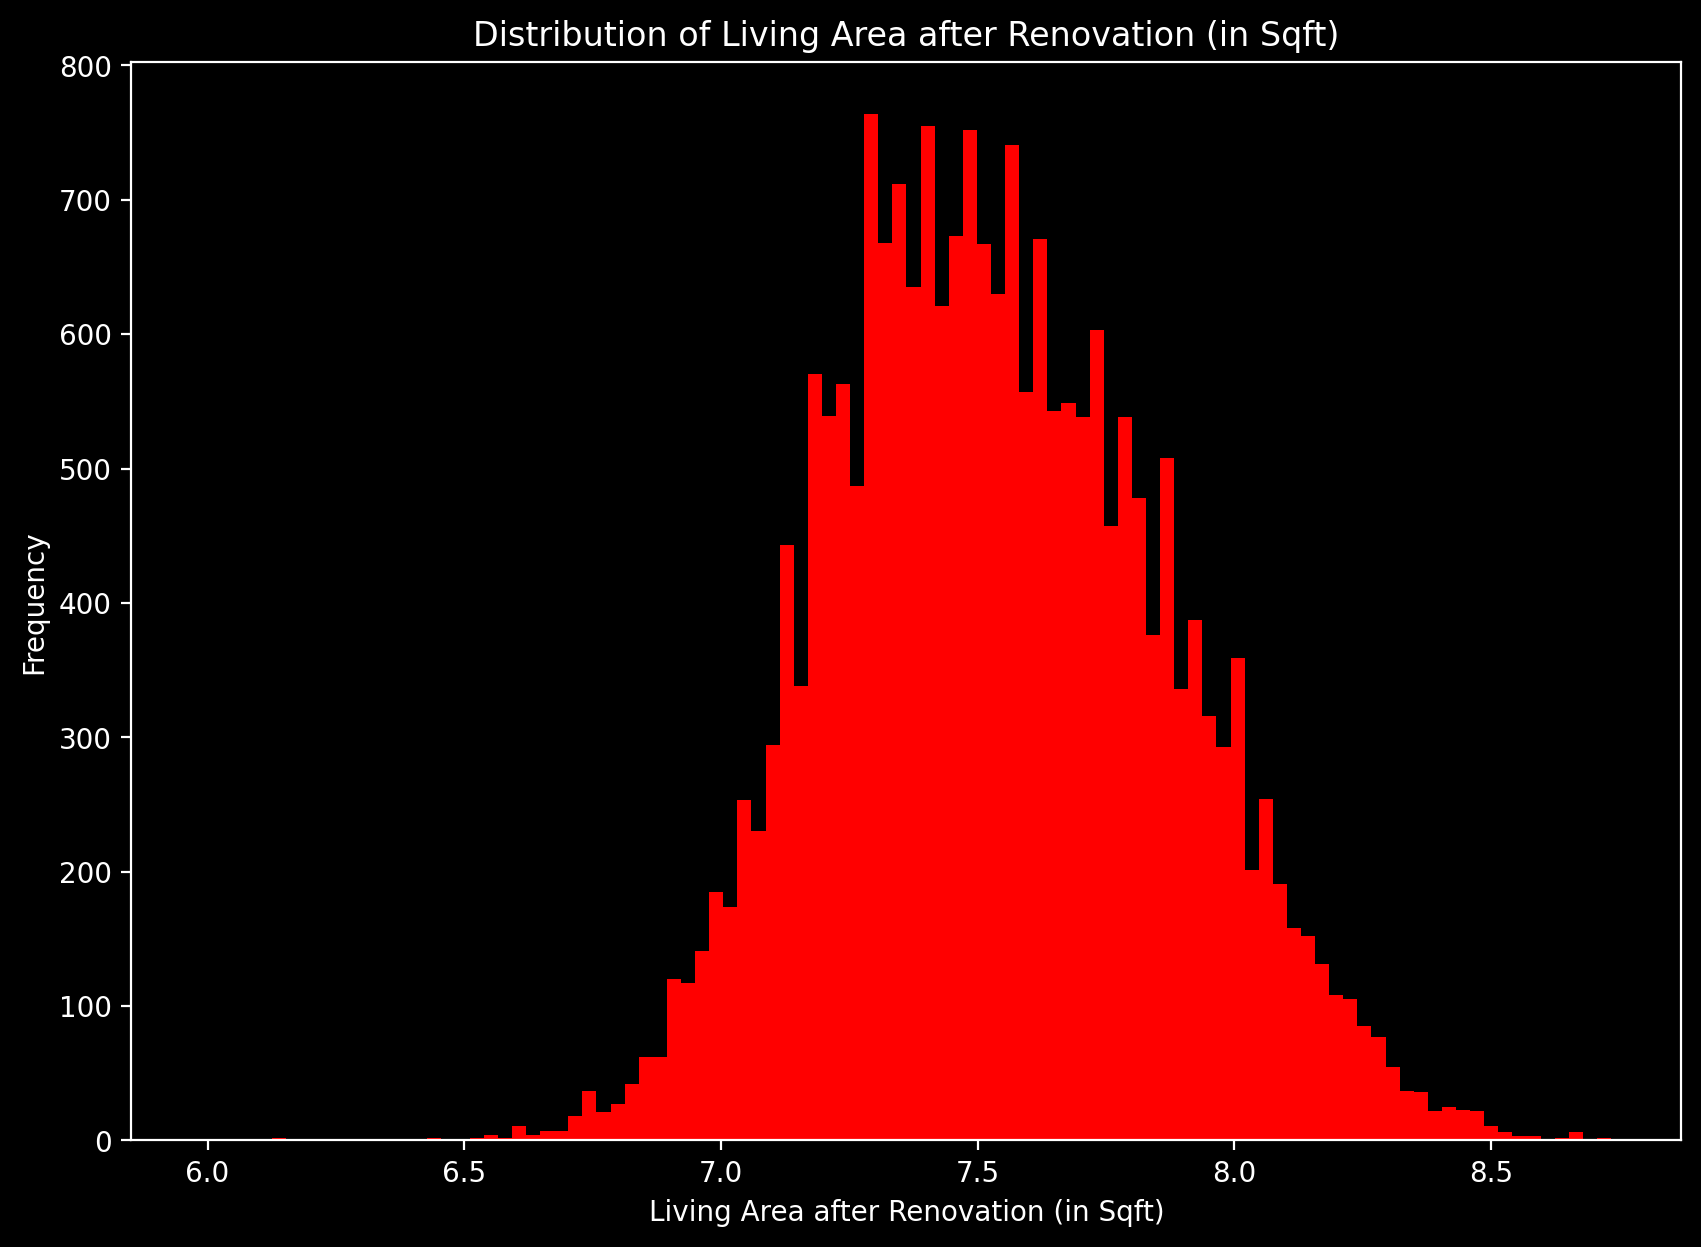

In [266]:
plt.figure(figsize=(10,7),dpi=200)
plt.hist(data['Living Area after Renovation (in Sqft)'], bins=100, color='red')
plt.xlabel('Living Area after Renovation (in Sqft)')
plt.ylabel('Frequency')
plt.title('Distribution of Living Area after Renovation (in Sqft)')
plt.show()

## Converting "zipcode" to categorical variable

In [267]:
data['Zipcode'] = data['Zipcode'].astype(object)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

## Transforming 'No of Times Visited' into numeric

In [268]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,7.073270,5650.0,1.0,No,None,...,7,7.073270,0,63,0,98178.0,47.5112,-122.257,7.200425,5650
1,6414100192,14 December 2017,538000.0,3,2.25,7.851661,7242.0,2.0,No,None,...,7,7.682482,400,67,1991,98125.0,47.7210,-122.319,7.432484,7639
2,5631500400,15 February 2016,180000.0,2,1.00,6.646391,10000.0,1.0,No,None,...,6,6.646391,0,85,0,98028.0,47.7379,-122.233,7.908387,8062
3,2487200875,14 December 2017,604000.0,4,3.00,7.580700,5000.0,1.0,No,None,...,7,6.956545,910,53,0,98136.0,47.5208,-122.393,7.215240,5000
4,1954400510,15 February 2016,510000.0,3,2.00,7.426549,8080.0,1.0,No,None,...,8,7.426549,0,31,0,98074.0,47.6168,-122.045,7.495542,7503


In [269]:
# find all unique values in 'No of Times Visited'
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [270]:
# Transforming it into numeric 
mapping = {
    'None':  '0',
    'Once':  '1',
    'Twice': '2',
    'Thrice':'3',
    'Four':  '4'
}

data['No of Times Visited']= data['No of Times Visited'].map(mapping)

In [271]:
data['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

## Generating new feature "Ever_Renovated"

In [272]:
# Creating new feature "Ever_Renovated"
data['Ever_Renovated']=np.where(data['Renovated Year']==0, "No", "Yes")
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated
0,7129300520,14 October 2017,221900.0,3,1.00,7.073270,5650.0,1.0,No,0,...,7.073270,0,63,0,98178.0,47.5112,-122.257,7.200425,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,7.851661,7242.0,2.0,No,0,...,7.682482,400,67,1991,98125.0,47.7210,-122.319,7.432484,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,6.646391,10000.0,1.0,No,0,...,6.646391,0,85,0,98028.0,47.7379,-122.233,7.908387,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,7.580700,5000.0,1.0,No,0,...,6.956545,910,53,0,98136.0,47.5208,-122.393,7.215240,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,7.426549,8080.0,1.0,No,0,...,7.426549,0,31,0,98074.0,47.6168,-122.045,7.495542,7503,No


## Generating new feature "Year Since Renovation"

In [273]:
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year

In [274]:
data['Year Since Renovation'] = np.where(data['Ever_Renovated']=='Yes',
                                        abs(data['Purchase Year']-data['Renovated Year']) , 0)

data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Purchase Year,Year Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,7.073270,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,7.200425,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,7.851661,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,7.432484,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,6.646391,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,7.908387,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,7.580700,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,7.215240,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,7.426549,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,7.495542,7503,No,2016,0


## Deleting Features which are not requierd

In [275]:
data.drop(columns=['Purchase Year', 'Date House was Sold', 'Renovated Year'], inplace = True)

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  object 
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

## Correlation

In [277]:
data.drop(columns=['ID'], inplace=True)

In [278]:
data.corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation
Sale Price,1.000000,0.339407,0.535124,0.666323,0.101319,0.298913,0.680914,0.586181,0.307513,-0.064306,0.402430,0.045401,0.607199,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.620788,0.031692,0.175536,0.349223,0.514917,0.303294,-0.154113,-0.008708,0.129569,0.405154,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.761225,0.087732,0.500776,0.635638,0.694711,0.283798,-0.505954,0.024570,0.223171,0.570777,0.087226,0.003551
Flat Area (in Sqft),0.666323,0.620788,0.761225,1.000000,0.148739,0.367863,0.721705,0.865043,0.423228,-0.349501,0.039450,0.255387,0.745864,0.160816,0.020286
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.148739,1.000000,-0.005162,0.102314,0.162421,0.015252,-0.053119,-0.085719,0.229449,0.144929,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.367863,-0.005162,1.000000,0.461368,0.547594,-0.245572,-0.489244,0.049692,0.125620,0.275502,-0.011204,-0.000901
Overall Grade,0.680914,0.349223,0.635638,0.721705,0.102314,0.461368,1.000000,0.722005,0.145232,-0.456711,0.111226,0.201736,0.671713,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.586181,0.514917,0.694711,0.865043,0.162421,0.547594,0.722005,1.000000,-0.050613,-0.450951,-0.018495,0.360334,0.712681,0.174955,0.013006
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.423228,0.015252,-0.245572,0.145232,-0.050613,1.000000,0.133072,0.110451,-0.144822,0.206261,0.017263,0.029158
Age of House (in Years),-0.064306,-0.154113,-0.505954,-0.349501,-0.053119,-0.489244,-0.456711,-0.450951,0.133072,1.000000,0.148083,-0.409515,-0.333757,-0.071016,0.203375


## Highly correlated independent variables with the target variable "Sales_Price"

In [279]:
# same way of writing the code as a list comprehension
k = data.corr()
z = [[str('Sale Price'),str(i),k.loc['Sale Price',i].round(2)] for i in k.columns if (k.loc['Sale Price' , i] > abs(0.5)) and (i!= 'Sale Price')]
pd.DataFrame(z, columns=['Target variable', 'independent variable', "corr_coefficient (r)"])

,Target variable,independent variable,corr_coefficient (r)
0,Sale Price,No of Bathrooms,0.54
1,Sale Price,Flat Area (in Sqft),0.67
2,Sale Price,Overall Grade,0.68
3,Sale Price,Area of the House from Basement (in Sqft),0.59
4,Sale Price,Living Area after Renovation (in Sqft),0.61


In [281]:
data.to_csv(r"D:\House Price Prediction\Raw_Housing_Prices_2.csv", index = False)

# 3: Feature Transformation of Categorical variables

In [388]:
data = pd.read_csv(r"D:\House Price Prediction\Raw_Housing_Prices_2.csv")
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Year Since Renovation
0,221900.0,3,1.00,7.073270,5650.0,1.0,No,0,Fair,7,7.073270,0,63,98178.0,47.5112,-122.257,7.200425,5650,No,0
1,538000.0,3,2.25,7.851661,7242.0,2.0,No,0,Fair,7,7.682482,400,67,98125.0,47.7210,-122.319,7.432484,7639,Yes,26
2,180000.0,2,1.00,6.646391,10000.0,1.0,No,0,Fair,6,6.646391,0,85,98028.0,47.7379,-122.233,7.908387,8062,No,0
3,604000.0,4,3.00,7.580700,5000.0,1.0,No,0,Excellent,7,6.956545,910,53,98136.0,47.5208,-122.393,7.215240,5000,No,0
4,510000.0,3,2.00,7.426549,8080.0,1.0,No,0,Fair,8,7.426549,0,31,98074.0,47.6168,-122.045,7.495542,7503,No,0


## 'Condition of the House' is ordinal categorical variable

In [389]:
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

## Mean Sale Price for each house condition

<AxesSubplot:xlabel='Condition of the House'>

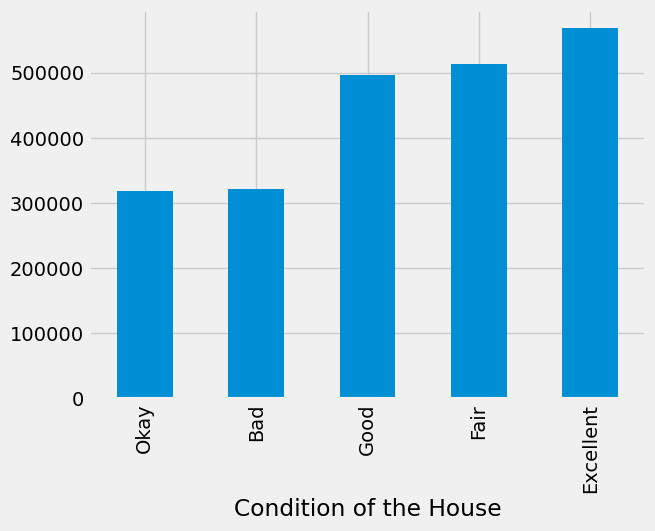

In [390]:
plt.style.use('default')
plt.style.use('fivethirtyeight')
data.groupby('Condition of the House')['Sale Price'].mean().sort_values().plot(kind='bar')

## Mean Sale Price based on condition "Ever Renovated"

<AxesSubplot:xlabel='Ever_Renovated'>

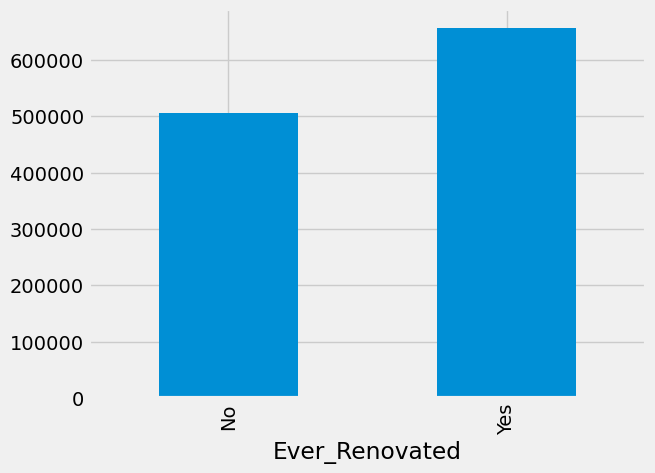

In [391]:
data.groupby('Ever_Renovated')['Sale Price'].mean().sort_values().plot(kind = 'bar')

## Mean Sale Price based on availabilitiy of Waterfront View

<AxesSubplot:xlabel='Waterfront View'>

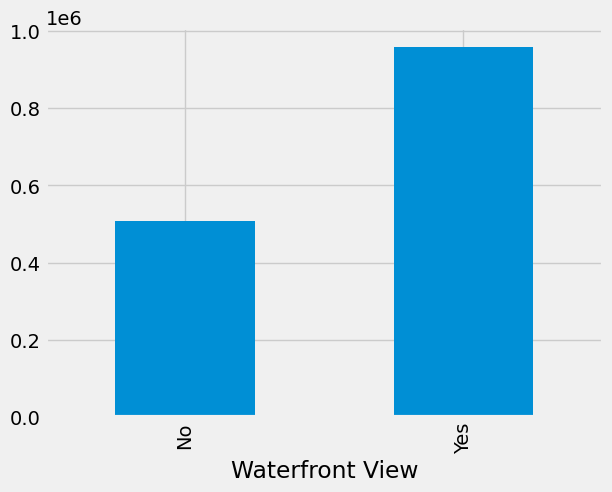

In [392]:
data.groupby('Waterfront View')['Sale Price'].mean().sort_values().plot(kind = 'bar')

## Mean Sale Price based on zipcode

<AxesSubplot:xlabel='Zipcode'>

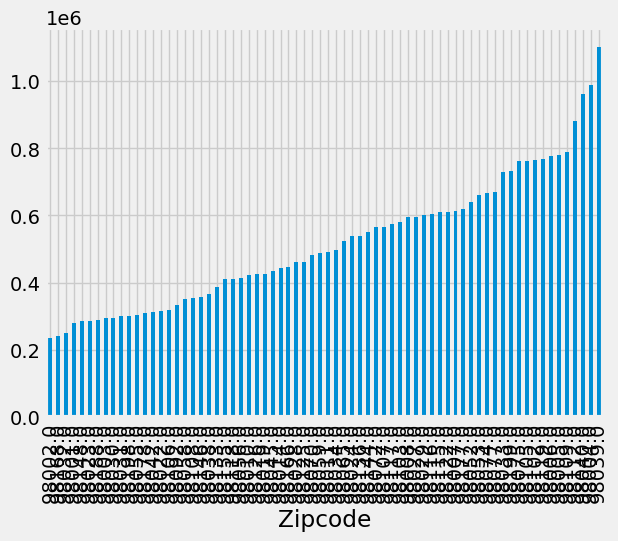

In [393]:
data.groupby('Zipcode')['Sale Price'].mean().sort_values().plot(kind = 'bar')

## Mean Sale Price based on Overall Grade

<AxesSubplot:xlabel='Overall Grade'>

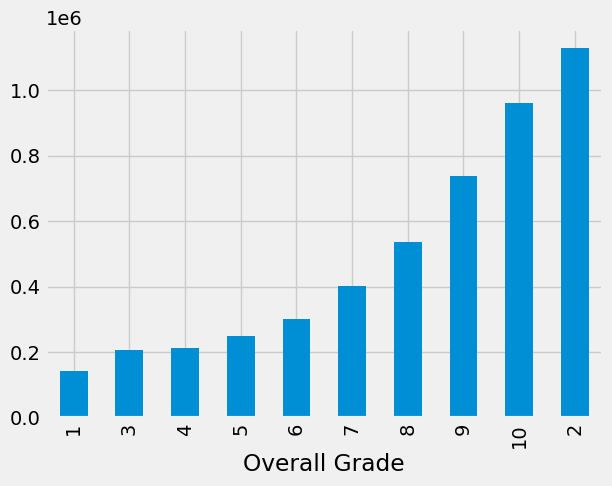

In [394]:
data.groupby('Overall Grade')['Sale Price'].mean().sort_values().plot(kind = 'bar')

# ANOVA

#### ANOVA stands for Analysis of Variance

In [395]:
# Here OLS stands from Ordinary Least Squares regression.
# We are are looking for regression model so we are using OLS.
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [396]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  int64  
 8   Condition of the House                     21609 non-null  object 
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

In [397]:
data = data.rename(columns = {'Sale Price' : 'Sale_Price'})
data = data.rename(columns = {'Condition of the House':'Condition_of_the_House'})
data = data.rename(columns = {'Waterfront View' : 'Waterfront_View'})
data = data.rename(columns = {'Overall Grade' : 'Overall_Grade'})

In [398]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront_View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  int64  
 8   Condition_of_the_House                     21609 non-null  object 
 9   Overall_Grade                              21609 non-null  int64  
 10  Area of the House from

In [399]:
#There are 3 types of anova test , here we are using 2nd type of anova.

In [400]:
mod = ols('Sale_Price ~ Condition_of_the_House', data=data).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
Condition_of_the_House,1.441831e+13,4.0,58.25563,5.447605e-49
Residual,1.336752e+15,21604.0,NaN,NaN


In [401]:
mod = ols('Sale_Price ~ Waterfront_View', data = data).fit()
sm.stats.anova_lm(mod, typ=2)

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [402]:
mod = ols('Sale_Price ~ Ever_Renovated', data = data).fit()
sm.stats.anova_lm(mod, typ = 2)

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [403]:
mod = ols('Sale_Price ~ Zipcode', data = data).fit()
sm.stats.anova_lm(mod, typ = 2)

,sum_sq,df,F,PR(>F)
Zipcode,2.503765e+12,1.0,40.112844,2.444308e-10
Residual,1.348666e+15,21607.0,NaN,NaN


In [404]:
mod = ols('Sale_Price ~ Overall_Grade', data = data).fit()
sm.stats.anova_lm(mod, typ = 2)

,sum_sq,df,F,PR(>F)
Overall_Grade,6.264623e+14,1.0,18677.835456,0.0
Residual,7.247077e+14,21607.0,NaN,NaN


### We found that above variables have impact on the target variable 'Sale_Price'

# Binning and combining features

In [405]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall_Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Year Since Renovation
0,221900.0,3,1.00,7.073270,5650.0,1.0,No,0,Fair,7,7.073270,0,63,98178.0,47.5112,-122.257,7.200425,5650,No,0
1,538000.0,3,2.25,7.851661,7242.0,2.0,No,0,Fair,7,7.682482,400,67,98125.0,47.7210,-122.319,7.432484,7639,Yes,26
2,180000.0,2,1.00,6.646391,10000.0,1.0,No,0,Fair,6,6.646391,0,85,98028.0,47.7379,-122.233,7.908387,8062,No,0
3,604000.0,4,3.00,7.580700,5000.0,1.0,No,0,Excellent,7,6.956545,910,53,98136.0,47.5208,-122.393,7.215240,5000,No,0
4,510000.0,3,2.00,7.426549,8080.0,1.0,No,0,Fair,8,7.426549,0,31,98074.0,47.6168,-122.045,7.495542,7503,No,0


In [406]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront_View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  int64  
 8   Condition_of_the_House                     21609 non-null  object 
 9   Overall_Grade                              21609 non-null  int64  
 10  Area of the House from

## Binning 'Condition_of_the_House' 

In [407]:
data['Condition_of_the_House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition_of_the_House, dtype: int64

In [408]:
mean_price = data['Sale_Price'].groupby(data['Condition_of_the_House']).mean().to_frame().reset_index().sort_values(by='Sale_Price')
mean_price.head()

,Condition_of_the_House,Sale_Price
4,Okay,318590.343023
0,Bad,322084.166667
3,Good,495734.828285
2,Fair,513974.065369
1,Excellent,568074.553204


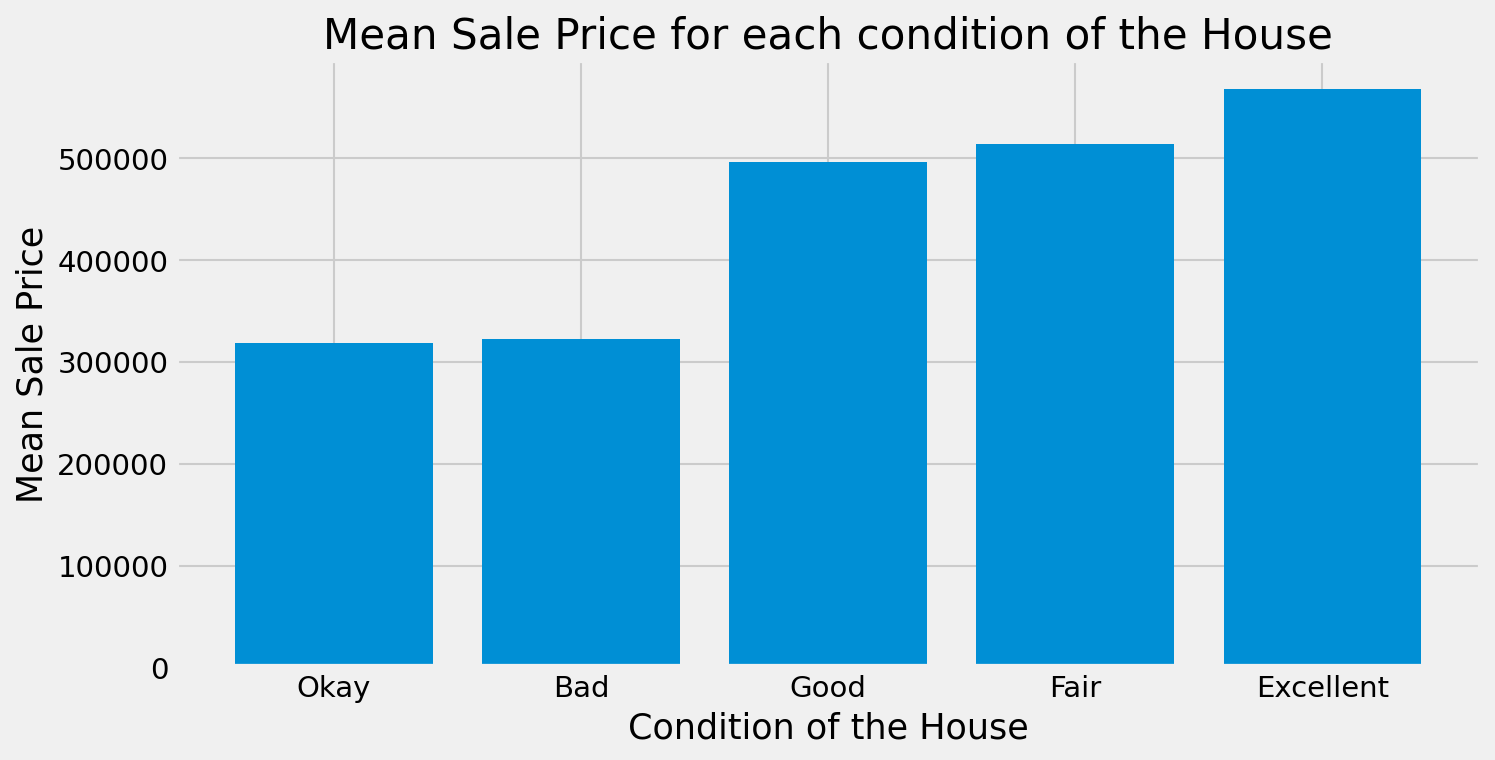

In [409]:
plt.figure(figsize=(10,5), dpi = 150)

plt.bar(mean_price['Condition_of_the_House'],
        mean_price['Sale_Price'])
plt.xlabel('Condition of the House')
plt.ylabel('Mean Sale Price')
plt.title("Mean Sale Price for each condition of the House")
plt.show()

## From this plot we can infer that average sale price for "Okay" and "Bad" categories are similer, and thats why we can combine this two features as one.

## We can also see that the conditions "Good" and "Fair" are also similer in terms of their average Sale Price, and we will combine them.

In [410]:
mapping = {
    "Excellent":"Excellent",
    "Good":"Good",
    "Fair":"Good",
    "Okay":"Okay",
    "Bad":"Okay"
}

In [411]:
data["Condition_of_the_House"] = data["Condition_of_the_House"].map(mapping)

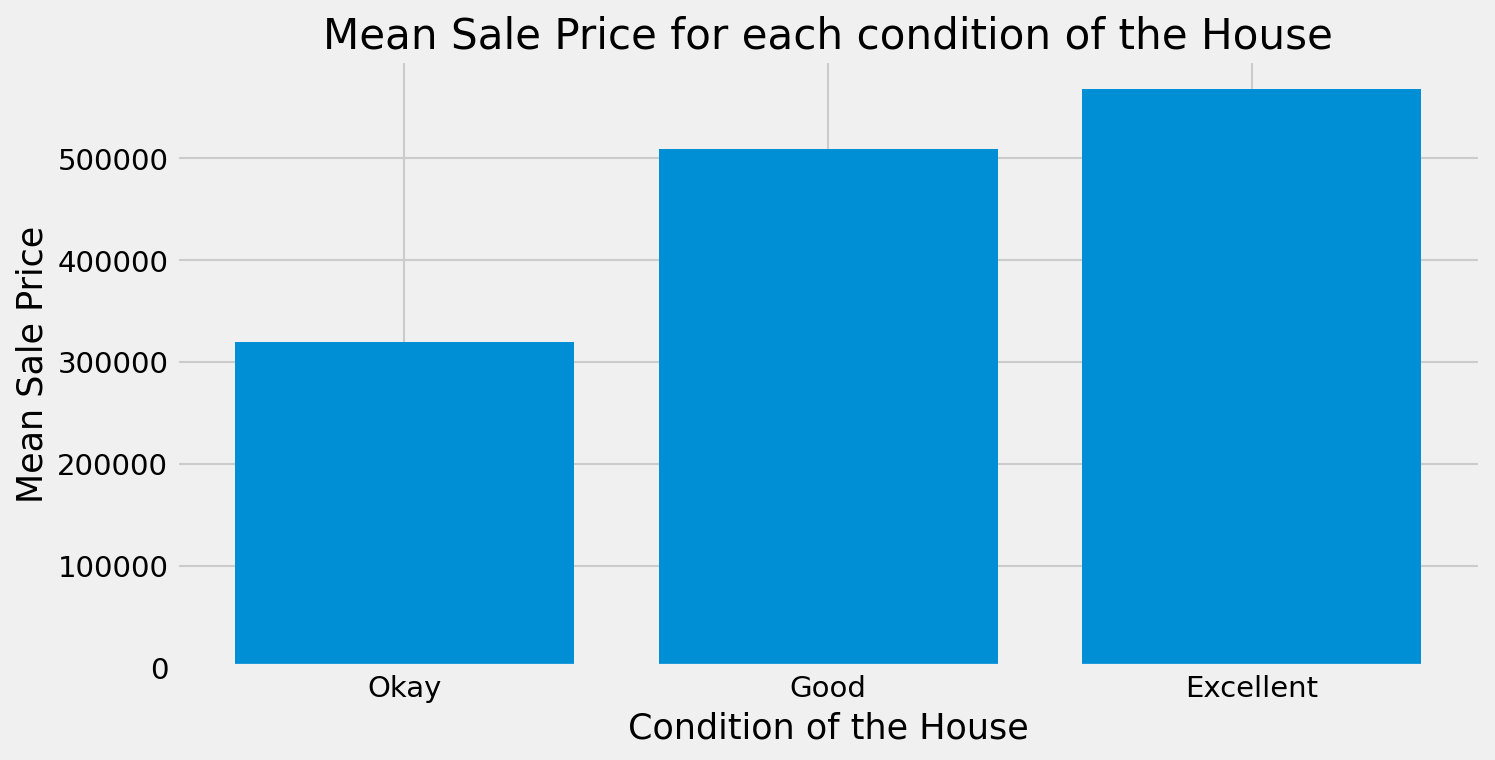

In [412]:
mean_price = data['Sale_Price'].groupby(data['Condition_of_the_House']).mean().to_frame().reset_index().sort_values(by='Sale_Price')

plt.figure(figsize=(10,5), dpi = 150)

plt.bar(mean_price['Condition_of_the_House'],
        mean_price['Sale_Price'])
plt.xlabel('Condition of the House')
plt.ylabel('Mean Sale Price')
plt.title("Mean Sale Price for each condition of the House")
plt.show()

## Binning of the "Age of House (in Years)" feature

In [413]:
len(data['Age of House (in Years)'].unique())

116

In [414]:
data['Age of House (in Years)'].max()

118

In [415]:
data['Age of House (in Years)'].min()

3

### we will catagories houses into "New" , "Old" and "Very old" on base of their age. 

In [416]:
def age_of_house(x):
    if x < 10:
        x = 'New'
    elif 10 <= x < 50:
        x = 'Old'
    else:
        x = 'Very Old'
    return x

In [417]:
data['Age of House'] = data['Age of House (in Years)'].map(age_of_house)

In [418]:
data.drop(columns= 'Age of House (in Years)', inplace=True)

In [419]:
data['Age of House'].unique()

array(['Very Old', 'Old', 'New'], dtype=object)

## Binning of the "zipcode" feature

### - Zipcode have 71 levels, it is difficult to manage 71 dummy variables.
### - We will Bin zipcodes with similar average Sale Price into Groups.
### - we will create 10 bins and categories zipcode based on average Sale Price

In [420]:
zip_table = data.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price', ascending = True)
zip_table.head(10)

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491
98023.0,286486.572289
98188.0,289078.345588
98003.0,294111.278571
98030.0,296187.980469


In [421]:
zip_table['Zipcode_group'] = pd.cut(zip_table['Sale_Price'], bins=10,
                                    labels=[
                                        'zipcode_group_0',
                                        'zipcode_group_1',
                                        'zipcode_group_2',
                                        'zipcode_group_3',
                                        'zipcode_group_4',
                                        'zipcode_group_5',
                                        'zipcode_group_6',
                                        'zipcode_group_7',
                                        'zipcode_group_8',
                                        'zipcode_group_9'
                                    ], include_lowest=True
                                   )

In [422]:
zip_table.head()

,Sale_Price,Zipcode_group
Zipcode,,
98002.0,234284.035176,zipcode_group_0
98168.0,240328.371747,zipcode_group_0
98032.0,251296.240000,zipcode_group_0
98001.0,280804.690608,zipcode_group_0
98148.0,284908.596491,zipcode_group_0


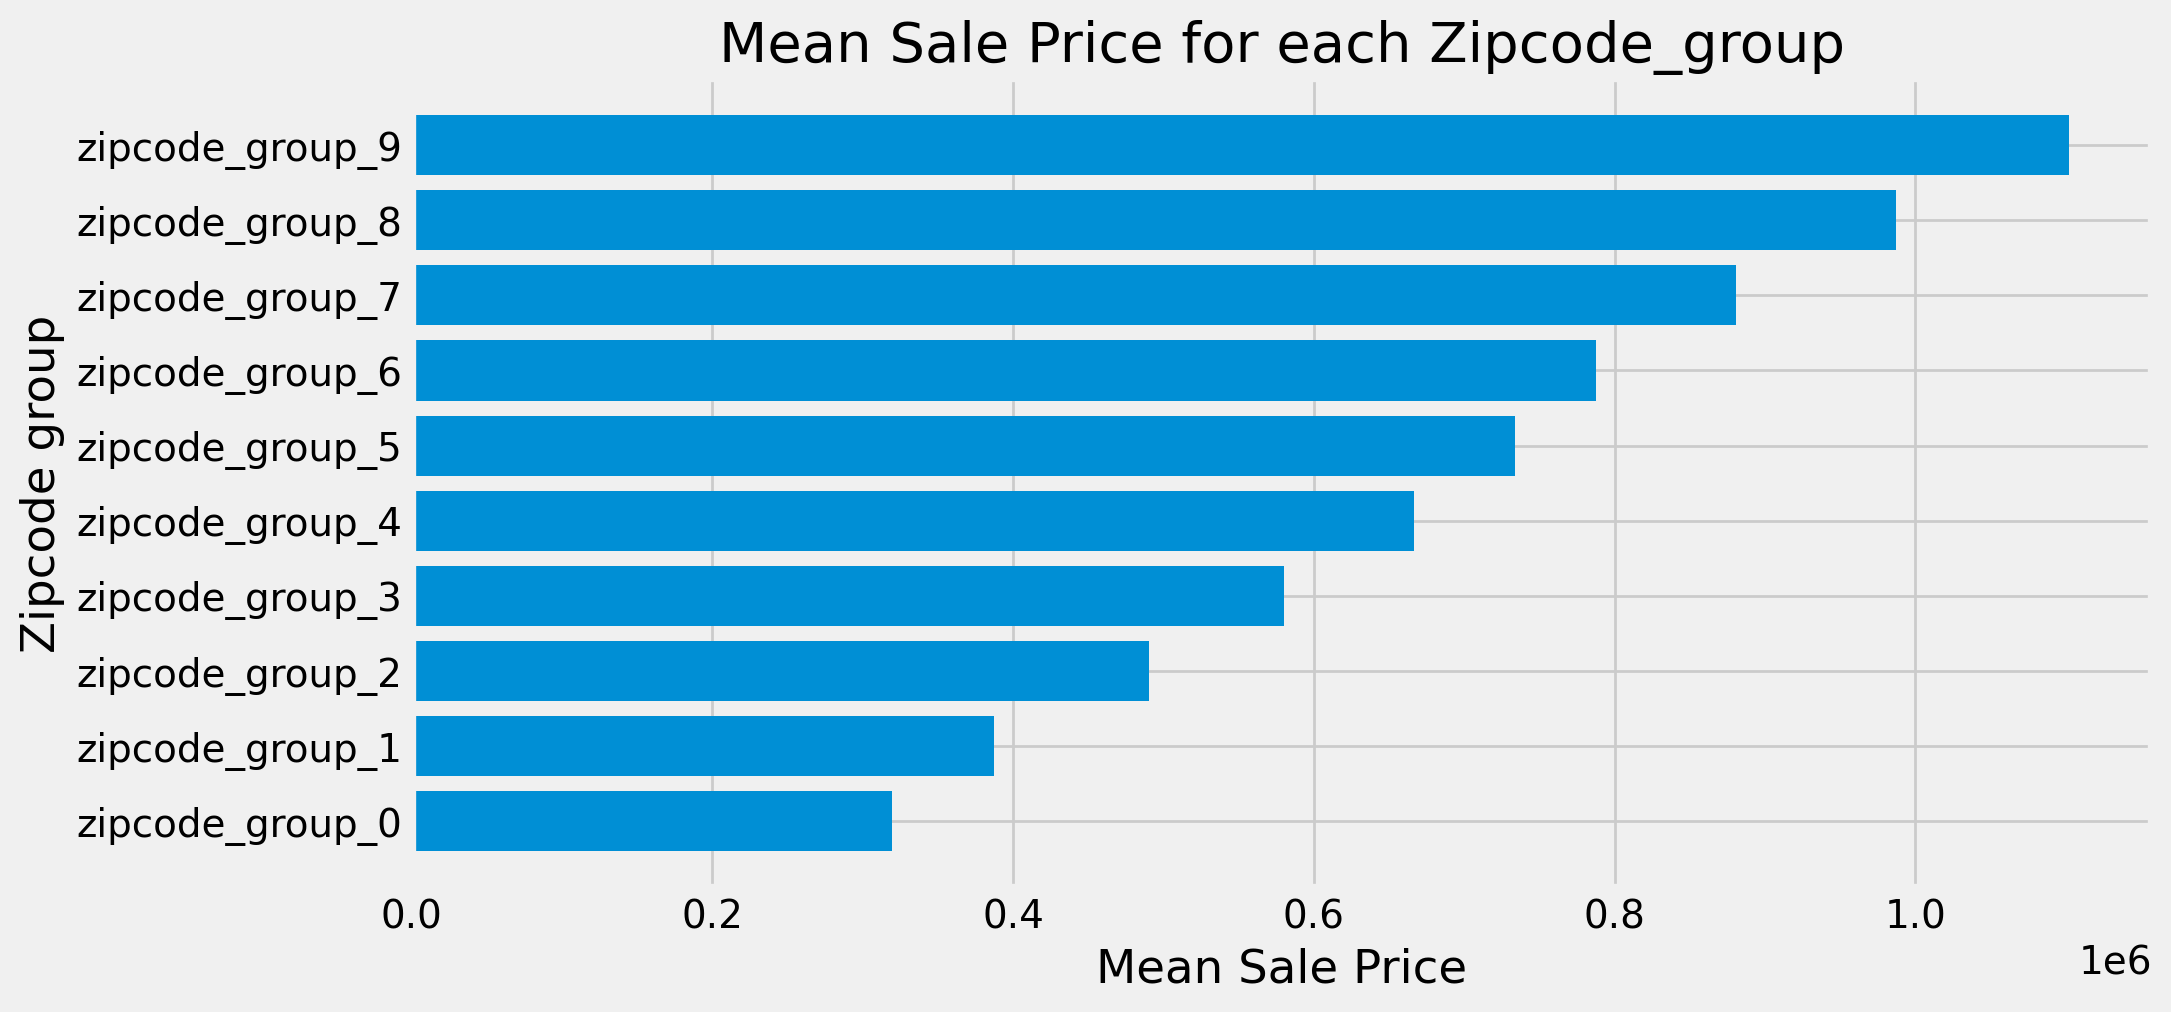

In [423]:
plt.figure(figsize=(10,5), dpi = 200)

plt.barh(zip_table['Zipcode_group'],
        zip_table['Sale_Price'])
plt.xlabel('Mean Sale Price')
plt.ylabel('Zipcode group')
plt.title("Mean Sale Price for each Zipcode_group")
plt.show()

In [424]:
zip_table = zip_table.drop(columns = 'Sale_Price')

In [425]:
zip_table.head()

,Zipcode_group
Zipcode,
98002.0,zipcode_group_0
98168.0,zipcode_group_0
98032.0,zipcode_group_0
98001.0,zipcode_group_0
98148.0,zipcode_group_0


In [426]:
data = pd.merge(data,
             zip_table,
             left_on='Zipcode',
             how = 'left',
             right_index= True)

In [427]:
data.drop(columns='Zipcode', inplace=True)

In [428]:
data.head(10)

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall_Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Year Since Renovation,Age of House,Zipcode_group
0,221900.0,3,1.00,7.073270,5650.0,1.0,No,0,Good,7,7.073270,0,47.5112,-122.257,7.200425,5650,No,0,Very Old,zipcode_group_0
1,538000.0,3,2.25,7.851661,7242.0,2.0,No,0,Good,7,7.682482,400,47.7210,-122.319,7.432484,7639,Yes,26,Very Old,zipcode_group_2
2,180000.0,2,1.00,6.646391,10000.0,1.0,No,0,Good,6,6.646391,0,47.7379,-122.233,7.908387,8062,No,0,Very Old,zipcode_group_2
3,604000.0,4,3.00,7.580700,5000.0,1.0,No,0,Excellent,7,6.956545,910,47.5208,-122.393,7.215240,5000,No,0,Very Old,zipcode_group_3
4,510000.0,3,2.00,7.426549,8080.0,1.0,No,0,Good,8,7.426549,0,47.6168,-122.045,7.495542,7503,No,0,Old,zipcode_group_4
5,1129575.0,4,4.50,8.597851,101930.0,1.0,No,0,Good,10,8.266164,1530,47.6561,-122.005,8.468003,101930,No,0,Old,zipcode_group_4
6,257500.0,3,2.25,7.447168,6819.0,2.0,No,0,Good,7,7.447168,0,47.3097,-122.327,7.713338,6819,No,0,Old,zipcode_group_0
7,291850.0,3,1.50,6.966024,9711.0,1.0,No,0,Good,7,6.966024,0,47.4095,-122.315,7.408531,9711,No,0,Very Old,zipcode_group_0
8,229500.0,3,1.00,7.484369,7470.0,1.0,No,0,Good,7,6.956545,730,47.5123,-122.337,7.484369,8113,No,0,Very Old,zipcode_group_1
9,323000.0,3,2.50,7.544332,6560.0,2.0,No,0,Good,7,7.544332,0,47.3684,-122.031,7.779049,7570,No,0,Old,zipcode_group_1


# Feature Generation for categorical variables

## Generating new feature "luxury_home"

### - It's seems logical to make an assumption that luxury houses should have higher Sale Price.
### - If we somehow able to define to define that then it will allow use to make better predictions for the Sale Price of the house

In [429]:
def luxury_home(row):
    count = 0
    if row[0] == 'Yes':
        count += 1
    if row[1] in ['Excellent' , 'Good']:
        count += 1
    if row[2] >= 8:
        count += 1
        
    if count >= 2:
        return 'Yes'
    else:
        return 'No'

In [430]:
data['luxury_home'] = data[['Waterfront_View', 'Condition_of_the_House', 'Overall_Grade']].apply(luxury_home, axis=1)

In [431]:
data['luxury_home'].unique()

array(['No', 'Yes'], dtype=object)

Text(0, 0.5, 'Mean Sale Price')

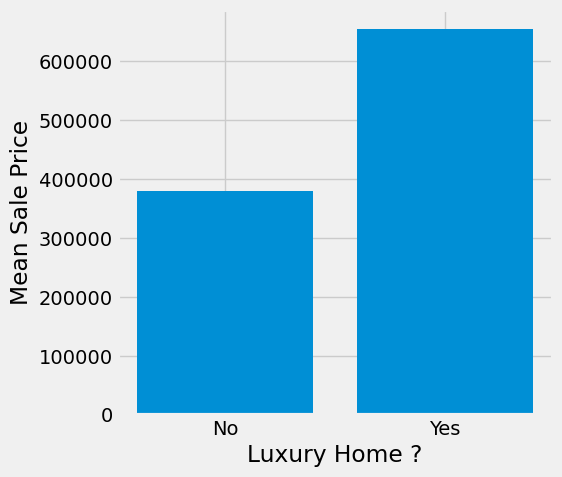

In [432]:
luxury = data['Sale_Price'].groupby(data['luxury_home']).mean().to_frame().reset_index()

plt.figure(figsize=(5,5), dpi=100)
plt.bar(luxury['luxury_home'], luxury['Sale_Price'])
plt.xlabel('Luxury Home ?')
plt.ylabel('Mean Sale Price')

In [433]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall_Grade,...,Basement Area (in Sqft),Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Year Since Renovation,Age of House,Zipcode_group,luxury_home
0,221900.0,3,1.00,7.073270,5650.0,1.0,No,0,Good,7,...,0,47.5112,-122.257,7.200425,5650,No,0,Very Old,zipcode_group_0,No
1,538000.0,3,2.25,7.851661,7242.0,2.0,No,0,Good,7,...,400,47.7210,-122.319,7.432484,7639,Yes,26,Very Old,zipcode_group_2,No
2,180000.0,2,1.00,6.646391,10000.0,1.0,No,0,Good,6,...,0,47.7379,-122.233,7.908387,8062,No,0,Very Old,zipcode_group_2,No
3,604000.0,4,3.00,7.580700,5000.0,1.0,No,0,Excellent,7,...,910,47.5208,-122.393,7.215240,5000,No,0,Very Old,zipcode_group_3,No
4,510000.0,3,2.00,7.426549,8080.0,1.0,No,0,Good,8,...,0,47.6168,-122.045,7.495542,7503,No,0,Old,zipcode_group_4,Yes


In [434]:
data.to_csv(r"D:\House Price Prediction\Raw_Housing_Prices_3.csv", index = False)

# Creation of Dummy Variables

In [435]:
data = pd.read_csv(r"D:\House Price Prediction\Raw_Housing_Prices_3.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront_View                            21609 non-null  object 
 7   No of Times Visited                        21609 non-null  int64  
 8   Condition_of_the_House                     21609 non-null  object 
 9   Overall_Grade                              21609 non-null  int64  
 10  Area of the House from

In [436]:
data = pd.get_dummies(data,
                      columns=[
                          "Waterfront_View",
                          "Condition_of_the_House",
                          "Ever_Renovated",
                          "Age of House",
                          "Zipcode_group",
                          "luxury_home"
                      ], drop_first= True
                     )

In [437]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Overall_Grade                              21609 non-null  int64  
 8   Area of the House from Basement (in Sqft)  21609 non-null  float64
 9   Basement Area (in Sqft)                    21609 non-null  int64  
 10  Latitude              

In [438]:
data.to_csv(r"D:\House Price Prediction\Transformed_Housing_Prices.csv", index = False)